# L1 Machine Learning to Deep Learning

Deep learning is now a part of many branches of computer science, from perception to NLP to computer vision. It gives computer and data scientists a common language and even a common set of tools.

Neural networks were fringe in 2000-2010. They only became popular again in recent years because of an increase in the volume of data and because cheap, fast GPUs increased computational power.


## Classification
Course will focus on problem of classification. Classification paves the way for regression, reinforcement learning, detection and ranking. See two examples below.

Example 1: Detection: Self-driving car detecting pedestrians from an image
* Use a binary pedestrian or no pedestrian classifier. Slide it over all possible locations in the image.

Example 2: Web Search Ranking (not really a ranking problem)
* Classifier takes a query-webpage pair and returns whether the page is relevant or not.

## Logistic Classifier

* A linear classifier. WX + b = Y
* X: inputs
* W: Weights (matrix)
* b: bias

Q: What is the result of 'training' this model?
A: Finding the weights and biases that can make accurate predictions.

Use a **softmax** function to turn scores into probabilites that sum to 1. These probabilities will be large when scores are large, and small when scores are small.
* Each image can have precisely one label, so we want to convert the scores to probabilities an image has a particular label.

Scores in logistical regression are also called **logits**.

[ 0.8360188   0.11314284  0.05083836]


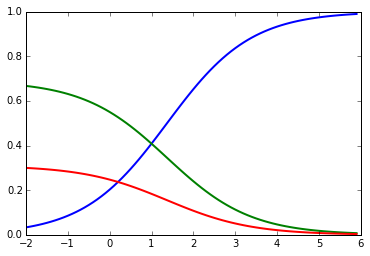

In [28]:
"""Softmax: Turning scores into probabilities."""

scores =  [3.0, 1.0, 0.2]

import numpy as np

def softmax(x):
    """Compute softmax values for x."""
    return np.exp(x)/np.sum(np.exp(x), axis=0)

# One row for each score and n columns, 
# where n is the number of samples.

print(softmax(scores))

# Plot softmax curves
import matplotlib.pyplot as plt
%matplotlib inline
# x-coordinates of points to plot
x = np.arange(-2.0, 6.0, 0.1)
# Create three arrays: x and two arrays shaped like x, one with 
# entries that are all ones, one with entries that are all 0.2.
# Stack arrays in sequence vertically (row-wise) with np.vstack.
scores = np.vstack([x, np.ones_like(x), 0.2 *np.ones_like(x)])

# .T is transpose
plt.plot(x, softmax(scores/1).T, linewidth=2)
# plt.label
plt.show()

In [15]:
"""Check that softmax probabilities sum to 1 for every value of x"""

print(np.sum(softmax(scores), axis=0))

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.]


In [18]:
# Q1: When you multiply scores by 10, what happens?
print(softmax(scores * 10))

# Q2: When you divide scores by 10, what happens?
print(softmax(scores / 10))

[[  9.35448489e-14   2.54281263e-13   6.91208136e-13   1.87889852e-12
    5.10737569e-12   1.38832865e-11   3.77386855e-11   1.02584383e-10
    2.78853264e-10   7.58001761e-10   2.06046241e-09   5.60091751e-09
    1.52248721e-08   4.13854922e-08   1.12497423e-07   3.05799643e-07
    8.31249175e-07   2.25956630e-06   6.14211417e-06   1.66958211e-05
    4.53826452e-05   1.23353201e-04   3.35237708e-04   9.10745952e-04
    2.47179601e-03   6.69062149e-03   1.79802867e-02   4.74107229e-02
    1.19167711e-01   2.68875482e-01   4.99916148e-01   7.30992629e-01
    8.80761858e-01   9.52558972e-01   9.82007865e-01   9.93304919e-01
    9.97526549e-01   9.99088643e-01   9.99664537e-01   9.99876564e-01
    9.99954587e-01   9.99983293e-01   9.99993854e-01   9.99997739e-01
    9.99999168e-01   9.99999694e-01   9.99999887e-01   9.99999959e-01
    9.99999985e-01   9.99999994e-01   9.99999998e-01   9.99999999e-01
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00  

In [ ]:
# A1: Probabilities get close to 0.0 or 1.0. 
# -> increasing size of output makes your classifier more confident.
# A2: Probabilites get close to a uniform distribution.
# -> decreasing size of output makes your classifier more uncertain.

# Bear in mind we don't want our classifier to be too confident 
# initially. We want it to become more confident as it learns with
# time.

Represent labels mathematically with **one-hot encoding**.
* We want the probabilities for the correct class to be close to 1 and the probabilities for incorrect class(es) to be close to 0.
* Each label represented by vector as long as their classes. Has value 1.0 for the correct class and zero everywhere else.

## Q: Confused as to whether you can swap a & c in the one-hot encoding quiz.

One-hot encoding works well until you have tens of thousands or even millions of classes. Then you will have long vectors that contain mostly zeros, which is inefficient. We will deal with this problem later with **embeddings**.

## Cross-entropy

Measure how we're doing by comparing S(Y) and one-hot encoding that corresponds to Y. Only used during training.

Measure distance between the two probability vectors using **cross entropy D(S,L)**. 

$$D(S,L) = \sum_i L_ilog(S_i)$$

* D stands for distance.
* S is softmax.
* L is one-hot encoding labels.
* D(S,L) is not symmetric. 
* Note log in expression. Softmax guarantees there are no zero probabilities, so you never take a log of zero.

![cross_entropy](./images/cross_entropy.png)

## Process outline: Multinomial Logistic Classification
* Turn input into logits using a linear model (multiply by weight matrix and add a bias).
* Feed logits (scores) into softmax to turn them into probabilities.
* Compare softmax probabilities to one-hot encoded labels using cross-entropy.

![multinomial_logistic_regression](./images/multinomial_logistic_regression.png)

Q: How do we find the weights and bias b to have a low distance for the correct class and a high distance for the incorrect class?

A: Can measure distance averaged over the entire training set. This is called the **training loss** or **cost**. We want to **minimise the loss**.

We've turned a machine learning problem into a numerical optimisation problem. We usually solve this optimisation problem using **gradient descent**.

![gradient_descent](./images/gradient_descent.png)

Two remaining obstacles:
1. Feeding image pixels into optimiser
2. How to initialise optimiser

### Numerical Stability
Numerical computations: need to care about calculating values that are too large or too small.

E.g. Adding small values to very large values can introduce large errors.

In [28]:
# This /should/ return 1.0
z = 10**9
for i in range(10**6):
    z += 10**(-6)
z -= 10**9
print(z)

0.95367431640625


In [29]:
# Compare the error here where we don't have large 
# numbers to the error in the previous case.
z = 1
for i in range(10**6):
    z += 10**(-6)
z -= 1
print(z)

0.9999999999177334


We want variables with **mean 0 and equal variance** in our optimisation problems. Union variance (var = 1) is nice.
* Non-adherence to this can result in a **badly conditioned** (vs well-conditioned) problem: Optimiser needs to do lots of searching to find a good solution.

Example: Normaliastion with images (R - 128)/128.

### Initialising weight and biases
Draw weights randomly from a Gaussian distribution N(0, sigma), where sigma is small.
* Large sigma: Distribution has extreme peak. 
* Small sigma: Distribution is uncertain. Better to start with.

### Optimisation Process

Deep learning is about scaling e.g. this linear model. You will notice it runs slowly even when we are using a linear model on a small amount of training data.

# Assignment 1

See ``1. nmist`` notebook in TensorFlow directory.

Training, validation and testing sets.

## Measuring performance

More subtle than you think. 

Problem if you have no test set: classifier may only memorise a training set and not generalise.

Problem if you have a test set but no validation set: In choosing parameters you gave a tiny bit of information to your classifier. So data from the validation set will bleed into your training set, but that's okay because you have test set you can rely on to measure your real performance.

### Validation Set Size
The bigger your test size, the less noisy the accuracy measurement will be.
Rule of thumb: A change that affects 30 examples is usually statistically significant and can be trusted. This heuristic only applies if classes are approximately equally distributed (i.e. important classes are not rare).

People therefore often hold back over 30,000 examples for their validation set so that their accuracy can be significant to 1 decimal place.

30,000 examples can be a lot. An alternative is **cross-validation**.

### More on Training Logistic Regression

Training logistic regression using gradient descent is great: for one, you're directly optimising the error measure you care about. A lot of ML research is therefore about **designing the right loss functions to optimise**.

BUT **gradient descent is difficult to scale**:
* Loss function incorporates all datapoints.
* Calculating the gradient takes 3x the computations for the loss function.
* This process is iterative, so we have to do this tens or even hundreds of times.

Instead of using all the data, we're going to use a tiny random sample of the data, say of size 1-1000. This seems like it will be a horrible estimator. Sometimes an iteration will get the direction of gradient descent completely wrong and increase the loss instead of decreasing it. We will compensate for this by increasing the number of iterations.

This is called **stochastic gradient descent**. This scales well with both data and model size (it's the only method that's fast enough), and so is at the core of deep learning even though it has issues.

### Things to Know when implementing SGD

1. Inputs need to have mean 0 and equal (small) variance.
2. Initial weights need to be random, have mean 0 and equal (small) variance.
3. **Momentum**: During each step, we're taking a tiny step in a random direction. On aggregate, these steps take us toward the minimum of the loss. We can take the knowledge accumulated from previous steps to inform us about where we should be heading. We can do this by keeping a running average of the gradient and using that instead of the direction of the current batch of the data. (e.g. M <- 0.9M + derivative of current batch) This often leads to better convergence. 
4. **Learning rate decay**: With SGD, we're taking smaller, noisier steps towards our objective. So what should the **size of steps** be? (This is a whole area of research.) It turns out that it's always beneficial to make steps smaller and smaller as you train. E.g. you can use exponential decay or make steps smaller when the loss plateaus.

### Learning rate tuning
Lower learning rate can often make learning faster.

SGD's reputation as 'Black Magic'

Many hyperparameters:
* Initial learning rate
* Learning rate decay
* Momentum
* Batch size
* Weight initialisation

Tip: When things don't work, try to lower your learning rate first.

Alternative approach: **ADAGRAD** is a modification of SGD that implicitly takes care of momentum and learning rate decacy for you. This makes learning less sensitive to hyperparameters and tends to be slightly worse than wewll-optimised SGD but is decent.